In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def kernel(x1, x2, bandwidth):
    e = np.exp(-0.5*((x1-x2)**2) / bandwidth**2)
    return e / np.sqrt(2*np.pi*bandwidth**2)

In [3]:
x = np.random.uniform(-1, 1, 100)

In [4]:
z = np.zeros(100)

In [5]:
print(x.shape)
print(z.shape)

(100,)
(100,)


Slika ilustruje kako se kernel koristi kao mera slicnosti izmedju instanci.
Kako se porede vektori $x$ i $z$, kernel ima vece vrednosti oko 0 sa obzirom da
tu vrednost vektora $x$ biva vrlo slicna vrednostima vektora $z$ (koji je nula svuda).

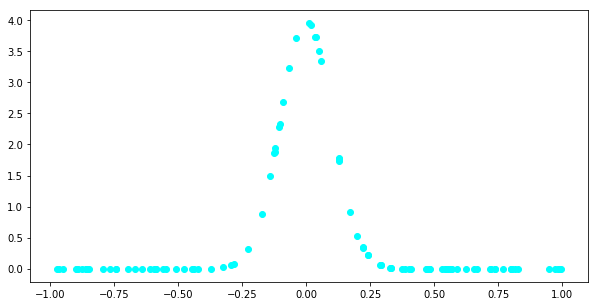

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(x, kernel(z, x, 0.1), color='aqua')

In [7]:
y = (x+1)**2 + np.random.randn(x.size)

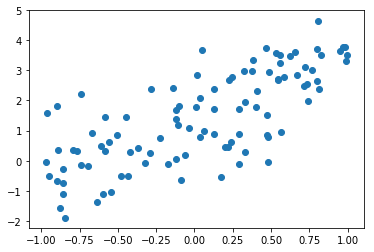

In [8]:
plt.scatter(x, y)

Model:
$$
\frac{\sum_{i=1}^{N} K_\sigma (x - x_i) \cdot y_i}{\sum_{j=1}^{N} K_\sigma(x - x_j)}
$$

U nasem primeru je nesto drugacije definisan kernel, odnosno funkcija kernela prihvata dve vrednosti ciju razliku konstruise prilikom izracunavanja.

In [9]:
def estimator(x_new, x, y, bandwidth):
    """
    Performs Nadaraya-Watson regression.
    """
    kernel_value = kernel(x, x_new, bandwidth)
    return np.sum(kernel_value * y) / np.sum(kernel_value)

In [10]:
def randomize(x, y):
    """
    Shuffles vectors x and y.
    """
    indexes = np.arange(x.size)
    np.random.shuffle(indexes)
    return x[indexes], y[indexes]

In [11]:
def split_datasets(x, y, ratio=2/3):
    """
    Splits x and y into two subvectors with given ratio.
    """
    x, y = randomize(x, y)
    N = x.size
    
    # Take train_validation subset
    x_train_validation = x[:int(N*ratio)]
    y_train_validation = y[:int(N*ratio)]
    
    # Take test subset
    x_test = x[int(N*ratio):]
    y_test = y[int(N*ratio):]
    
    return x_train_validation, y_train_validation, x_test, y_test

In [12]:
def mse(residuals):
    """ Calculates mean squared error by using given residuals """
    residuals = np.array(residuals)
    return np.mean(residuals**2)

In [13]:
def mae(residuals):
    """ Calculates mean absolute error by using given residuals """
    residuals = np.array(residuals)
    return np.mean(np.abs(residuals))

Vrsimo Nadaraja Votson regresiju.

In [14]:
x_train_validation, y_train_validation, x_test, y_test = split_datasets(x, y)

In [15]:
bandwidths = np.array([0.01, 0.1, 0.5, 1, 5, 10, 100])

In [16]:
print(x_train_validation.shape)
print(x_train_validation.size)

(66,)
66


In [17]:
errors = []

for bandwidth in bandwidths:
    leave_one_out_errors = np.zeros(x_train_validation.size)
    
    for i in range(0, x_train_validation.size):
        # Izbacujemo i-tu instancu iz podataka.
        # x_fit i y_fit su skupovi instanci BEZ i-te instance.
        x_fit = np.delete(x_train_validation, i)
        y_fit = np.delete(y_train_validation, i)
        
        # predvidjamo i-tu instancu (x_train_validation[i]) na osnovu originalnih podataka BEZ nje (x_fit, y_fit).
        y_predicted = estimator(x_train_validation[i], x_fit, y_fit, bandwidth)
        
        # Izracunavamo rezidual i upisujemo je u vektor reziduala.
        error = y_train_validation[i] - y_predicted
        leave_one_out_errors[i] = error
        
    error = mse(leave_one_out_errors)
    errors.append(error)
    
errors = np.array(errors)

In [18]:
errors

array([2.2377364 , 1.26211416, 1.33011349, 1.80585351, 2.33060003,
       2.35303828, 2.3605334 ])

In [23]:
# Uzimamo bandwidth koji je prouzrokovao najmanju gresku.
best_bandwidth = bandwidths[np.argmin(errors)]
best_bandwidth

0.1

Vrsimo testiranje na test skupu za najbolji bandwidth koji smo pronasli.

In [20]:
y_predictions = []
test_errors = []

# Prolazimo kroz test skup instancu po instancu
for x_new, y_new in zip(x_test, y_test):
    # Vrsimo predikciju za instancu 'x_new'
    # na osnovu originalnih podataka (ne uzimamo u obzir podatke za testiranje)
    y_predicted = estimator(x_new, x_train_validation, y_train_validation, best_bandwidth)
    
    # Upisujemo predikciju
    y_predictions.append(y_predicted)
    
    # Belezimo gresku (odnosno pamtimo reziduale)
    error = y_predicted - y_new
    test_errors.append(error)

In [21]:
test_error = mse(test_errors)
test_error

1.0205441099462222

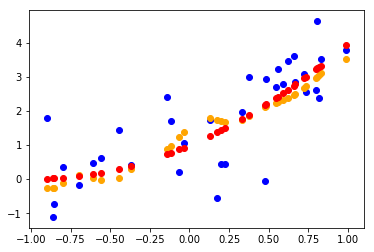

In [22]:
# Iscrtavamo instance iz skupa za testiranje
plt.scatter(x_test, y_test, color='blue')

# Iscrtavamo predikcije za instance iz skupa za testiranje
plt.scatter(x_test, y_predictions, color='orange')

# Iscrtavamo tacke iz ciljne funkcije
plt.scatter(x_test, (x_test + 1)**2, color='red')